In [1]:
#flight prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to show diagram without writing plot.show()

In [3]:
train_df=pd.read_excel("D:/datasets/flight prediction/Data_Train.xlsx")  #importing dataset 1
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df=pd.read_excel("D:/datasets/flight prediction/Test_set.xlsx") #importing dataset2
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
final_df=train_df.append(test_df) #combining both dataset
final_df.head()
final_df.shape

C:\Users\samar\AppData\Local\Temp\ipykernel_3272\473000402.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=train_df.append(test_df) #combining both dataset


(13354, 11)

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
#date of journey is in string value
#starting with feature engineering 

In [8]:
#feature engineering process 
#spliting the date values in date month and year categories
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [9]:
#converting str values to int
final_df['Date']=final_df['Date'].astype(int)
final_df['Date']=final_df['Month'].astype(int)
final_df['Date']=final_df['Year'].astype(int)

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), int32(1), object(12)
memory usage: 1.5+ MB


In [11]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,2019,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,03,2019


In [12]:
final_df['Arrival_Time'].str.split(' ') #removing the date value in arrival time column  by spliting function

0       [01:10, 22, Mar]
1                [13:15]
2       [04:25, 10, Jun]
3                [23:30]
4                [21:35]
              ...       
2666    [20:25, 07, Jun]
2667             [16:55]
2668    [04:25, 07, Mar]
2669             [19:15]
2670             [19:15]
Name: Arrival_Time, Length: 13354, dtype: object

In [13]:
final_df['Arrival_Time']=final_df['Arrival_Time'].apply(lambda x : x.split(' ')[0]) 

In [14]:
final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min']=final_df['Arrival_Time'].str.split(':').str[0]


In [15]:
final_df['Arrival_hour']=final_df['Arrival_hour'].astype(int) #converting str values to string 
final_df['Arrival_min']=final_df['Arrival_min'].astype(int) #converting str values to string 

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  object 
 12  Year             13354 non-null  object 
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(3), object(11)
memory usage: 1.5+ MB


In [17]:
final_df.drop('Arrival_Time',axis=1, inplace=True) #dropping Arrival time column 

In [18]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,2019,03,2019,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,2019,05,2019,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,2019,06,2019,4,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,2019,05,2019,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,2019,03,2019,21,21


In [19]:
#doing the same for departure column
final_df['Dept_hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_min']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dept_hour']=final_df['Dept_hour'].astype(int)
final_df['Dept_min']=final_df['Dept_min'].astype(int)
final_df.drop('Dep_Time',axis=1, inplace=True)

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  object 
 10  Year             13354 non-null  object 
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dept_hour        13354 non-null  int32  
 14  Dept_min         13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [21]:
final_df['Total_Stops'].unique() #to see different types of stops

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [22]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2, '3 stops':3, '4 stops':4,}) #assigning values to number of stops


In [23]:
final_df.drop('Route',axis=1,inplace=True) #dropping  route coulmn as its not useful for this eda

In [24]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,03,2019,1,1,22,22
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,05,2019,13,13,5,5
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,06,2019,4,4,9,9
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,2019,05,2019,23,23,18,18
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,2019,03,2019,21,21,16,16


In [25]:
final_df['Additional_Info'].unique() #checking unique values in Additional info column 

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  object 
 9   Year             13354 non-null  object 
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dept_hour        13354 non-null  int32  
 13  Dept_min         13354 non-null  int32  
dtypes: float64(2), int32(5), object(7)
memory usage: 1.3+ MB


In [27]:
final_df['duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0] #spliting the values by h 

In [28]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,03,2019,1,1,22,22,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,05,2019,13,13,5,5,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,06,2019,4,4,9,9,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,2019,05,2019,23,23,18,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,2019,03,2019,21,21,16,16,4


In [29]:
#final_df['duration_hour']=final_df['duration_hour'].astype('int')
#im getting error as there are 5m values in duration which is not possible 
#error-invalid literal for int() with base 10: '5m'

In [30]:
final_df[final_df['duration_hour']=='5m'] 
#solving error
#finding out rows with 5 minute values

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,2019,03,2019,16,16,16,16,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,2019,03,2019,16,16,16,16,5m


In [31]:
final_df.drop(6474,axis=0,inplace=True) 
final_df.drop(2660,axis=0,inplace=True) 
#5m flight time is not possible so we gonna drop them

In [32]:
final_df[final_df['duration_hour']=='5m'] 

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour


In [33]:
final_df['duration_hour']=final_df['duration_hour'].astype('int') #converting to int

In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  object 
 9   Year             13351 non-null  object 
 10  Arrival_hour     13351 non-null  int32  
 11  Arrival_min      13351 non-null  int32  
 12  Dept_hour        13351 non-null  int32  
 13  Dept_min         13351 non-null  int32  
 14  duration_hour    13351 non-null  int32  
dtypes: float64(2), int32(6), object(7)
memory usage: 1.3+ MB


In [35]:
final_df.describe()

,Total_Stops,Price,Date,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
count,13350.000000,10681.000000,13351.0,13351.000000,13351.000000,13351.000000,13351.000000,13351.000000
mean,0.825768,9085.898979,2019.0,13.395776,13.395776,12.512995,12.512995,10.234964
std,0.674478,4610.921950,0.0,6.896836,6.896836,5.736678,5.736678,8.473072
min,0.000000,1759.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,5277.000000,2019.0,8.000000,8.000000,8.000000,8.000000,2.000000
50%,1.000000,8372.000000,2019.0,14.000000,14.000000,11.000000,11.000000,8.000000
75%,1.000000,12373.000000,2019.0,19.000000,19.000000,18.000000,18.000000,15.000000
max,4.000000,79512.000000,2019.0,23.000000,23.000000,23.000000,23.000000,47.000000


Text(0.5, 1.0, 'Histogram For Time Duration Of Flights')

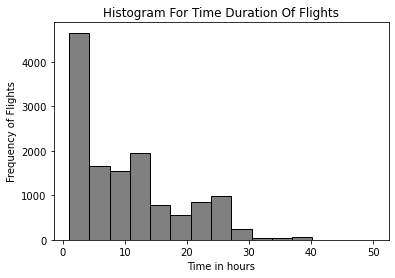

In [36]:

plt.hist(final_df['duration_hour'],edgecolor='black',facecolor='gray', bins=15, range=[1,50])   
plt.ylabel('Frequency of Flights')
plt.xlabel('Time in hours')
plt.title('Histogram For Time Duration Of Flights')



In [37]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,2019,03,2019,1,1,22,22,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,2019,05,2019,13,13,5,5,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,2019,06,2019,4,4,9,9,19
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,2019,05,2019,23,23,18,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,2019,03,2019,21,21,16,16,4


In [38]:
final_df['Airline'].unique() #unique values for airline

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

Text(0.5, 1.0, 'Price vs Source')

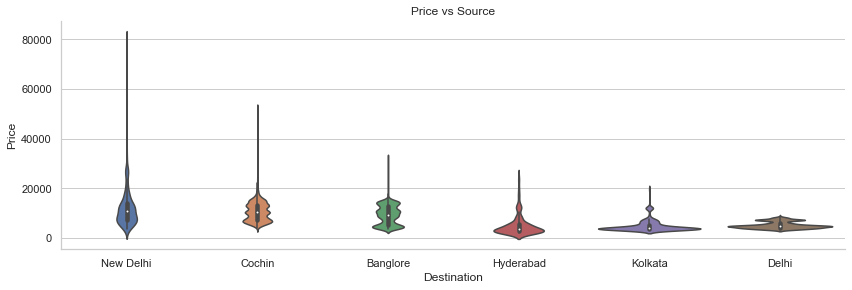

In [88]:
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.title('Price vs Source')


Text(0.5, 1.0, 'Boxplot For Correlaton Between Price Of Flight With Number Of Stops')

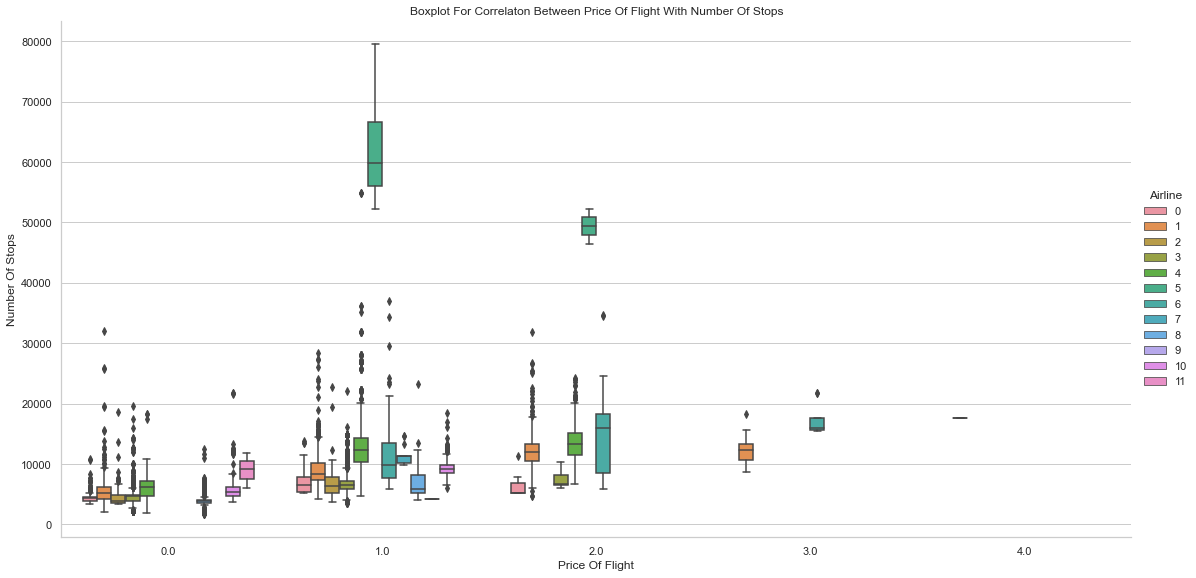

In [57]:

sns.catplot(data=final_df, x="Total_Stops", y="Price", hue='Airline', kind="box",height=8,aspect=2)
plt.ylabel('Number Of Stops')
plt.xlabel('Price Of Flight')
plt.title('Boxplot For Correlaton Between Price Of Flight With Number Of Stops')

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [41]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [42]:
final_df.shape

(13351, 15)

In [43]:
final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,3,0,5,2h 50m,0.0,8,3897.0,2019,03,2019,1,1,22,22,2
1,1,3,0,7h 25m,2.0,8,7662.0,2019,05,2019,13,13,5,5,7


In [44]:
pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)


,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,...,Destination_5,Additional_Info_1,Additional_Info_2,Additional_Info_3,Additional_Info_4,Additional_Info_5,Additional_Info_6,Additional_Info_7,Additional_Info_8,Additional_Info_9
0,2h 50m,0.0,3897.0,2019,03,2019,1,1,22,22,...,1,0,0,0,0,0,0,0,1,0
1,7h 25m,2.0,7662.0,2019,05,2019,13,13,5,5,...,0,0,0,0,0,0,0,0,1,0
2,19h,2.0,13882.0,2019,06,2019,4,4,9,9,...,0,0,0,0,0,0,0,0,1,0
3,5h 25m,1.0,6218.0,2019,05,2019,23,23,18,18,...,0,0,0,0,0,0,0,0,1,0
4,4h 45m,1.0,13302.0,2019,03,2019,21,21,16,16,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,23h 55m,1.0,NaN,2019,06,2019,20,20,20,20,...,0,0,0,0,0,0,0,0,1,0
2667,2h 35m,0.0,NaN,2019,03,2019,16,16,14,14,...,0,0,0,0,0,0,0,0,1,0
2668,6h 35m,1.0,NaN,2019,03,2019,4,4,21,21,...,0,0,0,0,0,0,0,0,1,0
2669,15h 15m,1.0,NaN,2019,03,2019,19,19,4,4,...,0,0,0,0,0,0,0,0,1,0
